<a href="https://colab.research.google.com/github/purna333/Sentiment-Analysis-SVM/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
fb_db = pd.read_excel("fb_sentiment.xlsx")
twitter_db = pd.read_excel("Twitter_Data.xlsx")

In [ ]:
fb_db.head()

,S.No,clean_text,Label
0,1,Drug Runners and a U.S. Senator have somethin...,O
1,2,"Heres a single, to add, to Kindle. Just read t...",O
2,3,If you tire of Non-Fiction.. Check out http://...,O
3,4,Ghost of Round Island is supposedly nonfiction.,O
4,5,Why is Barnes and Nobles version of the Kindle...,N


In [ ]:
twitter_db.head()

,S.No,clean_text,category
0,1,when modi promised â€œminimum government maxim...,-1.0
1,2,talk all the nonsense and continue all the dra...,0.0
2,3,what did just say vote for modi welcome bjp t...,1.0
3,4,asking his supporters prefix chowkidar their n...,1.0
4,5,answer who among these the most powerful world...,1.0


In [ ]:
twitter_db.drop(['S.No'],axis=1 ,inplace=True)
twitter_db.head()

,clean_text,category
0,when modi promised â€œminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twitter_db.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
twitter_db=twitter_db.dropna()

In [ ]:
twitter_db.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
twitter_db['category']=twitter_db['category'].astype(int)

In [ ]:
twitter_db.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1
162976,dear rss terrorist payal gawar what about modi...,-1
162977,did you cover her interaction forum where she ...,0
162978,there big project came into india modi dream p...,0
162979,have you ever listen about like gurukul where ...,1


In [ ]:
fb_db.drop(['S.No'],axis=1 ,inplace=True)
fb_db.head()

,clean_text,Label
0,Drug Runners and a U.S. Senator have somethin...,O
1,"Heres a single, to add, to Kindle. Just read t...",O
2,If you tire of Non-Fiction.. Check out http://...,O
3,Ghost of Round Island is supposedly nonfiction.,O
4,Why is Barnes and Nobles version of the Kindle...,N


In [ ]:
fb_db.isnull().sum()

clean_text    2
Label         0
dtype: int64

In [ ]:
fb_db=fb_db.dropna()

In [ ]:
fb_db.isnull().sum()

clean_text    0
Label         0
dtype: int64

In [ ]:
fb_db.rename(columns={'Label':'category'} ,inplace=True)

In [ ]:
fb_db['category'].replace({'O':0,'N':-1,'P':1},inplace=True)
fb_db

,clean_text,category
0,Drug Runners and a U.S. Senator have somethin...,0
1,"Heres a single, to add, to Kindle. Just read t...",0
2,If you tire of Non-Fiction.. Check out http://...,0
3,Ghost of Round Island is supposedly nonfiction.,0
4,Why is Barnes and Nobles version of the Kindle...,-1
...,...,...
995,I liked it. Its youth oriented and I think th...,1
996,"I think the point of the commercial is that, e...",1
997,Kindle 3 is such a great product. I could not ...,1
998,develop a way to share books! that is a big d...,-1


In [ ]:
fb_db['category']=fb_db['category'].astype(int)

In [ ]:
twitter_db.head()

,clean_text,category
0,when modi promised â€œminimum government maxim...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [ ]:
fb_db.head()

,clean_text,category
0,Drug Runners and a U.S. Senator have somethin...,0
1,"Heres a single, to add, to Kindle. Just read t...",0
2,If you tire of Non-Fiction.. Check out http://...,0
3,Ghost of Round Island is supposedly nonfiction.,0
4,Why is Barnes and Nobles version of the Kindle...,-1


In [ ]:
appended_df= pd.concat([twitter_db,fb_db])
data = appended_df.sample(frac=1).reset_index(drop=True)
print(data.head())

                                          clean_text  category
0  what about modiâ€™ 6000 per year farmers thatâ...        -1
1  skin cancer stop boot liking fake gandhis what...         1
2      youth with modi\nvote and support modi again          0
3  truth prevails modiâ€™ speech mission shakti d...         0
4  and its too late now crying over your planes y...        -1


In [ ]:
data['clean_text'][0]

'what about modiâ€™ 6000 per year farmers thatâ€™ not free money '

In [ ]:
data.tail()

,clean_text,category
163962,course want who can talk and also walk sabka s...,0
163963,father was also banker gave very good life fro...,1
163964,hamid pakistanis should put chowkidar their tw...,1
163965,modi jokers what will your choice for india,0
163966,and this guys who heard about the lac amount o...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163967 entries, 0 to 163966
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  163967 non-null  object
 1   category    163967 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
data['clean_text']=data['clean_text'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163967 entries, 0 to 163966
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  163967 non-null  object
 1   category    163967 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
data.describe()

,category
count,163967.000000
mean,0.227497
std,0.780918
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.shape

(163967, 2)

In [ ]:
data.size

327934

In [ ]:
data['category'].value_counts()

 1    72890
 0    55489
-1    35588
Name: category, dtype: int64

Text(0.5, 1.0, 'Proportion Target Class')

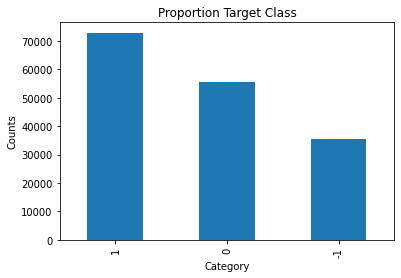

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
data['category'].value_counts().plot(kind='bar')
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Proportion Target Class")

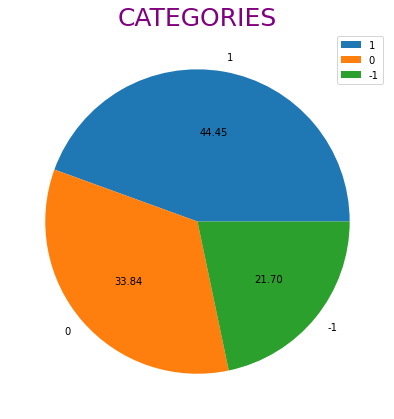

In [ ]:
plt.figure(figsize=(7,7))
ax =data.category.value_counts()
labels=data['category'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("CATEGORIES",fontsize=25,color='purple')
plt.legend()
plt.show()

In [ ]:
!pip install num2words
import re
from num2words import num2words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=c93981235b98ce7bb4df62ddb0f4ca2c4ce38e6b77a765c9655665802f23b654
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
def lowercase_text(text):
    if isinstance(text, str):
        # Split the text into individual words
        words = text.split()
        # Convert each word to lowercase if it doesn't contain any digits
        words = [word.lower() if not any(char.isdigit() for char in word) else word for word in words]
        # Join the words back together into a single string
        lowercase_text = " ".join(words)
        return lowercase_text
    else:
        return text
# Apply the lowercase_text function to the 'text' column of the dataset
data['clean_text'] = data['clean_text'].apply(lowercase_text)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163967 entries, 0 to 163966
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  163967 non-null  object
 1   category    163967 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
data['clean_text'][0]

'what about modiâ€™ 6000 per year farmers thatâ€™ not free money'

In [ ]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
#     text = text.replace(/(?:https?|ftp):\/\/[\n\S]+/g, '')
#             .replace('#', '')
    #removal of hyperLinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub('[^A-Za-z0-9]+',' ',text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #removal of HashTags
    text = text.replace('#', '')
    # Split the text into individual words
    words = text.split()
    # Convert any numbers to their written equivalent
    words = [num2words(word) if word.isdigit() else word for word in words]
    # Join the words back together into a single string
    text = " ".join(words)
    return text
# preprocess_text("today is 5 MMUUI")
# Apply the preprocess_text function to the 'text' column of the dataset
data['clean_text'] = data['clean_text'].apply(lambda x: preprocess_text(str(x)))

In [ ]:
data['clean_text'][0]

'what about modi per year farmers that not free money'

In [ ]:
for clean_text in data.select_dtypes(include=['object']):
    data[clean_text] = data[clean_text].str.strip()

In [ ]:
for clean_text in data.select_dtypes(include=['object']):
    data [clean_text] = data[clean_text].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [ ]:
import nltk
nltk.download('punkt')
# import nltk
from nltk.tokenize import word_tokenize
# tokens = nltk.tokenize.word_tokenize(data[clean_text])
# print(tokens)
data['clean_text'] = data['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['clean_text'][0]

['what',
 'about',
 'modi',
 'per',
 'year',
 'farmers',
 'that',
 'not',
 'free',
 'money']

In [ ]:
# Download stop words if not already downloaded
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a function to remove stop words
def remove_stopwords(tokens):
    stop_words = stopwords.words('english')
    return [word for word in tokens if word not in stop_words]

# Remove stop words from the tokens column
data['clean_text'] = data['clean_text'].apply(remove_stopwords)

# Join the tokens back together into a string
data['processed_text'] = data['clean_text'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(data['clean_text'][0])
data['processed_text'][0]

['modi', 'per', 'year', 'farmers', 'free', 'money']


'modi per year farmers free money'

In [ ]:
data.head()

,clean_text,category,processed_text
0,"[modi, per, year, farmers, free, money]",-1,modi per year farmers free money
1,"[skin, cancer, stop, boot, liking, fake, gandh...",1,skin cancer stop boot liking fake gandhis ever...
2,"[youth, modi, vote, support, modi]",0,youth modi vote support modi
3,"[truth, prevails, modi, speech, mission, shakt...",0,truth prevails modi speech mission shakti viol...
4,"[late, crying, planes, thought, listening, hat...",-1,late crying planes thought listening hate war ...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['clean_text']=data['clean_text'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data[clean_text][0]

['modi', 'per', 'year', 'farmer', 'free', 'money']

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
data['clean_text']=data['clean_text'].apply(lambda x: stemming(x))

In [ ]:
data['clean_text'][0]

['modi', 'per', 'year', 'farmer', 'free', 'money']

In [ ]:
data['text_n_chars'] = data.processed_text.apply(len) # count all chars in each sentence
data['text_n_words'] = data.processed_text.apply(lambda sent: len(sent.split())) # count number of words in each sentence
data.head()

,clean_text,category,processed_text,text_n_chars,text_n_words
0,"[modi, per, year, farmer, free, money]",-1,modi per year farmers free money,32,6
1,"[skin, cancer, stop, boot, like, fake, gandhi,...",1,skin cancer stop boot liking fake gandhis ever...,131,22
2,"[youth, modi, vote, support, modi]",0,youth modi vote support modi,28,5
3,"[truth, prevail, modi, speech, mission, shakti...",0,truth prevails modi speech mission shakti viol...,92,13
4,"[late, cri, plane, thought, listen, hate, war,...",-1,late crying planes thought listening hate war ...,130,19


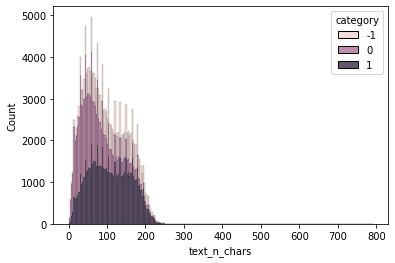

In [ ]:
import seaborn as sns
sns.histplot(data=data, x= 'text_n_chars', hue= 'category', multiple= 'stack');

In [ ]:
from collections import Counter

In [ ]:
words = [word for sent in data['processed_text'] for word in sent.split()]
words[:10]

['modi',
 'per',
 'year',
 'farmers',
 'free',
 'money',
 'skin',
 'cancer',
 'stop',
 'boot']

In [ ]:
# sort words descending order
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
freq_words_df = pd.DataFrame(freq_words_sorted[:20], columns=['word', 'counts'])

In [ ]:
freq_words_df.head(10)

,word,counts
0,modi,155554
1,india,29157
2,bjp,14647
3,people,13924
4,congress,12829
5,like,12655
6,narendra,11466
7,govt,10026
8,one,9443
9,vote,9304


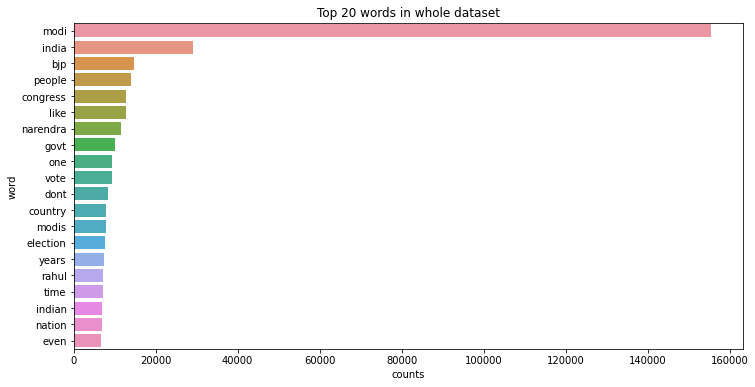

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data= freq_words_df , x= 'counts', y= 'word')
plt.title('Top 20 words in whole dataset')
plt.show();

In [ ]:
data['temp_list'] = data['processed_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,modi,155554
1,india,29157
2,bjp,14647
3,people,13924
4,congress,12829
5,like,12655
6,narendra,11466
7,govt,10026
8,one,9443
9,vote,9304


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()


In [ ]:
positive = data[data['category'] == 1]
neutral = data[data['category'] == 0]
negative=data[data['category'] == -1]

In [ ]:
top = Counter([item for sublist in positive['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,modi,70476
1,india,16082
2,bjp,7050
3,people,6973
4,like,6152
5,congress,5817
6,narendra,5535
7,one,5076
8,govt,4896
9,good,4811


In [ ]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()


In [ ]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()


/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
top = Counter([item for sublist in negative['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,india,6347
2,people,4075
3,bjp,3619
4,like,3449
5,congress,3444
6,govt,2634
7,poor,2628
8,dont,2355
9,one,2277
10,even,2062


In [ ]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
top = Counter([item for sublist in neutral['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,india,6728
2,narendra,4016
3,bjp,3978
4,congress,3568
5,vote,3055
6,like,3054
7,people,2876
8,modis,2625
9,govt,2496
10,dont,2270


In [ ]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
# getting list of positive words
positive_text_clean = data[data['category' ] == 1]['processed_text']
positive_clean_words = [word for words in positive_text_clean for word in words.split()]
positive_clean_words[:10]

['skin',
 'cancer',
 'stop',
 'boot',
 'liking',
 'fake',
 'gandhis',
 'ever',
 'nehru',
 'nation']

In [ ]:
# getting list of negative words
negative_text_clean = data[data['category' ] == -1]['processed_text']
negative_clean_words = [word for words in negative_text_clean for word in words.split()]
negative_clean_words[:10]

['modi',
 'per',
 'year',
 'farmers',
 'free',
 'money',
 'late',
 'crying',
 'planes',
 'thought']

In [ ]:
# getting list of neutral words
neutral_text_clean = data[data['category' ] == 0]['processed_text']
neutral_clean_words = [word for words in neutral_text_clean for word in words.split()]
neutral_clean_words[:10]

['youth',
 'modi',
 'vote',
 'support',
 'modi',
 'truth',
 'prevails',
 'modi',
 'speech',
 'mission']

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


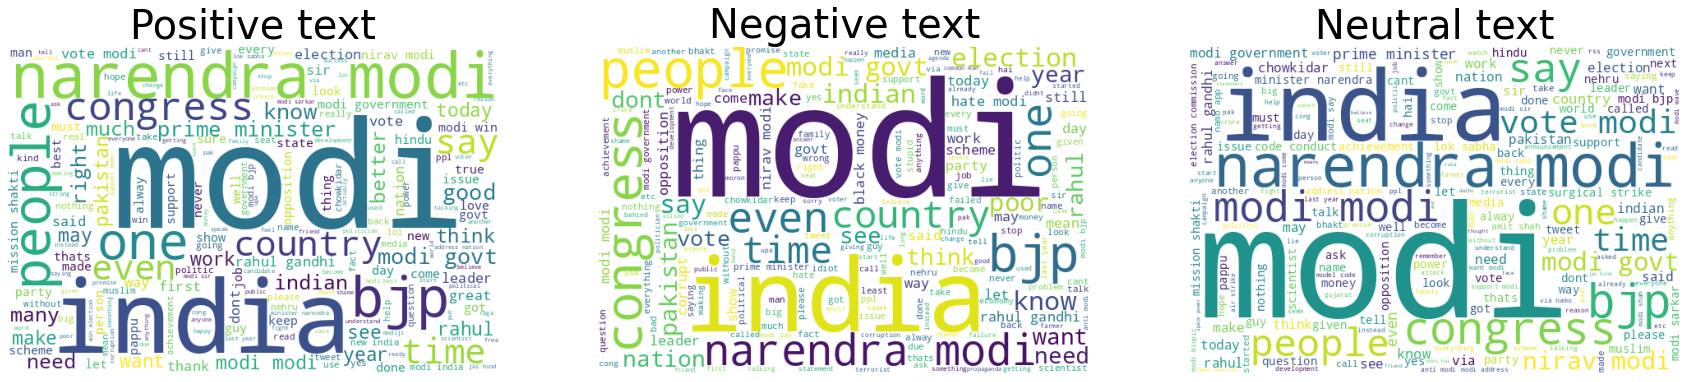

In [ ]:
import wordcloud
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive_clean_words))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive text',fontsize=40);
wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative_clean_words))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative text',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(neutral_clean_words))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral text',fontsize=40);

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
texts = data['clean_text'].tolist()
tagged_texts = []
for text in texts:
    tagged_words = nltk.pos_tag(text)
    tagged_texts.append(tagged_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
print(tagged_texts[0])

[('modi', 'NN'), ('per', 'IN'), ('year', 'NN'), ('farmer', 'NN'), ('free', 'JJ'), ('money', 'NN')]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text_data = data['processed_text'].tolist()
# Create a CountVectorizer object
count_vectorizer = CountVectorizer()
# Fit and transform the text data
vector = count_vectorizer.fit_transform(text_data)
# Get the vocabulary (i.e., the list of unique words in the text data)
vocab = count_vectorizer.get_feature_names_out()
# Print the count vectorizer results
print('Number of rows in dataset:', len(text_data))
print('Vocabulary size:', len(vocab))
print(text_data[0])
print(vector[0])

Number of rows in dataset: 163967
Vocabulary size: 100270
modi per year farmers free money
  (0, 57059)	1
  (0, 67199)	1
  (0, 99195)	1
  (0, 30655)	1
  (0, 32692)	1
  (0, 58216)	1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse
# Initialize CountVectorizer
vectorizer = CountVectorizer()
# Fit and transform the text data in your dataset
bag_of_words = vectorizer.fit_transform(data['processed_text'])
# Print the shape of the sparse matrix
print(f"Sparse matrix shape: {bag_of_words.shape}")
# Convert the sparse matrix to a pandas dataframe
df_bow = pd.DataFrame.sparse.from_spmatrix(bag_of_words)
# Print the top 10 words with the highest frequencies
top_words = df_bow.mean().sort_values(ascending=False)[:10]
print(top_words)

Sparse matrix shape: (163967, 100270)
57059    0.948691
41839    0.177822
10863    0.089329
67079    0.084920
18646    0.078241
51281    0.077180
60393    0.069929
35548    0.061146
63703    0.057591
96181    0.056743
dtype: float64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Get text data
text_data = data['processed_text'].tolist()
# Create a TfidfVectorizer object to transform text data into a tf-idf representation
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the text data
vectorizer.fit(text_data)
# Transform the text data into a tf-idf representation
tfidf = vectorizer.transform(text_data)
# Print the tf-idf matrix
print(tfidf)

  (0, 99195)	0.4481291375273232
  (0, 67199)	0.4536286033904649
  (0, 58216)	0.3773582609699939
  (0, 57059)	0.09546630744374789
  (0, 32692)	0.4639189493777901
  (0, 30655)	0.476096105543827
  (1, 96563)	0.21515352593548454
  (1, 90553)	0.19887941861900468
  (1, 85509)	0.18316600489241605
  (1, 82879)	0.32137201028576284
  (1, 67079)	0.12222880270799248
  (1, 61218)	0.3447081577727742
  (1, 60568)	0.290281862538148
  (1, 57059)	0.04017308171493432
  (1, 51346)	0.2977344586830997
  (1, 51281)	0.12464424878999897
  (1, 48913)	0.1489993813871881
  (1, 35156)	0.15387658560149328
  (1, 34326)	0.214860445617942
  (1, 33637)	0.2336847720163885
  (1, 30327)	0.18712300635740461
  (1, 29133)	0.19093231106493816
  (1, 27560)	0.1416847610031585
  (1, 27545)	0.22306934431006972
  (1, 13614)	0.30175106967327503
  :	:
  (163964, 16345)	0.13170728224941441
  (163965, 57059)	0.10860311787189803
  (163965, 46236)	0.7366122363871254
  (163965, 41839)	0.2689263874816963
  (163965, 16022)	0.61097166391683

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install keras

**CNN**

In [ ]:
# import pandas as pd
# import numpy as np
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Load the data
# # df = pd.read_csv('your_data.csv')
# texts = data['clean_text'].values
# labels = data['category'].values

# # Tokenize the words
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)

# # Pad the sequences
# max_len = 100
# data = pad_sequences(sequences, maxlen=max_len)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Build the model
# model = Sequential()
# model.add(Embedding(5000, 128, input_length=max_len))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(accuracy*100)

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

In [ ]:

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Load the data
# # df = pd.read_csv('your_data.csv')
# texts = data['clean_text'].values
# labels = data['category'].astype(int).values  # Convert labels to integers

# # Tokenize the words
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)

# # Pad the sequences
# max_len = 100
# data = pad_sequences(sequences, maxlen=max_len)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Build the model
# model = Sequential()
# model.add(Embedding(5000, 128, input_length=max_len))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dropout(0.5))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test.astype(int)))


**CNN**

In [ ]:
# import pandas as pd
# import numpy as np
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, Flatten, Dropout
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split

# # Load the data
# # df = pd.read_csv('your_data.csv')
# texts = data['clean_text'].values
# labels = data['category'].astype(int).values  # Convert labels to integers

# # Tokenize the words
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)

# # Pad the sequences
# max_len = 100
# data = pad_sequences(sequences, maxlen=max_len)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Build the model
# model = Sequential()
# model.add(Embedding(5000, 128, input_length=max_len))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=4))
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=4))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test.astype(int)))


In [ ]:
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(accuracy*100)

**RNN**

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # load your data into a list of strings
# text = data['clean_text'].values # replace `data` with your actual data variable
# labels = data['category'].values # replace `data` with your actual data variable

# # preprocess the data
# tokenizer = Tokenizer(num_words=10000)  # only keep the 10k most frequent words
# tokenizer.fit_on_texts(text)
# sequences = tokenizer.texts_to_sequences(text)
# padded_sequences = pad_sequences(sequences, maxlen=100)  # pad sequences to a fixed length of 100 words

# # create the RNN model
# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
# model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(units=1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # split the data into training and testing sets
# split_idx = int(0.8 * len(padded_sequences))
# train_sequences, test_sequences = padded_sequences[:split_idx], padded_sequences[split_idx:]
# train_labels, test_labels = labels[:split_idx], labels[split_idx:]

# # train the model
# model.fit(train_sequences, train_labels, epochs=10, batch_size=64)

# # evaluate the model
# test_loss, test_acc = model.evaluate(test_sequences, test_labels)
# print(test_acc)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # load your data into a list of strings
# text =  data['clean_text'].values# your 1.7 million data points here
# labels = data['category'].values

# # preprocess the data
# tokenizer = Tokenizer(num_words=10000)  # only keep the 10k most frequent words
# tokenizer.fit_on_texts(text)
# sequences = tokenizer.texts_to_sequences(text)
# padded_sequences = pad_sequences(sequences, maxlen=100)  # pad sequences to a fixed length of 100 words

# # create the RNN model
# model = Sequential()
# model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
# model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(units=1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # train the model
# model.fit(padded_sequences, labels, epochs=10, batch_size=64)

# # evaluate the model
# test_loss, test_acc = model.evaluate(test_sequences, test_labels)
# print(test_acc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import csv

def preProcessor(Tweet):
    import re
    from string import punctuation
    text=re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    text=re.sub(r'['+punctuation+']',' ',Tweet)
    text=re.sub('[^A-Za-z0-9]+',' ',Tweet)
    text=re.sub(r'#(\w+)',' ',Tweet)
    text=re.sub(r'@(\w+)',' ',Tweet)
    #print(token.tokenize(text))
    return Tweet

token=RegexpTokenizer(r'\w+')
cv=CountVectorizer(lowercase=True,preprocessor=preProcessor,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
#text_counts=cv.fit_transform(data['Tweet'])
text_counts=cv.fit_transform(data['processed_text'].values.astype('U'))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(text_counts,data['sentiment'],test_size=0.3)
x_train, x_test, y_train, y_test = train_test_split(text_counts,data['category'],test_size=0.3)

**SVM**

In [ ]:
from sklearn import svm
from sklearn import metrics

clf = svm.LinearSVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
metrics.accuracy_score(y_test, pred)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.853408143766136

**Naive Bayes**

In [ ]:
# from sklearn.naive_bayes import *


# clf=BernoulliNB()
# clf.fit(x_train,y_train)
# clf.fit(x_train,y_train)
# pred=clf.predict(x_test)
# metrics.accuracy_score(y_test, pred)

**LSTM**

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# reviews = data['processed_text'].values
# labels = data['category'].values
# encoder = LabelEncoder()
# encoded_labels = encoder.fit_transform(labels)

In [ ]:
# train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [ ]:
# vocab_size = 3000 # choose based on statistics
# oov_tok = ''
# embedding_dim = 100
# max_length = 200 # choose based on statistics, for example 150 to 200
# padding_type='post'
# trunc_type='post'
# # tokenize sentences
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(train_sentences)
# word_index = tokenizer.word_index
# # convert train dataset to sequence and pad sequences
# train_sequences = tokenizer.texts_to_sequences(train_sentences)
# train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# # convert Test dataset to sequence and pad sequences
# test_sequences = tokenizer.texts_to_sequences(test_sentences)
# test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
# import keras
# model = keras.Sequential([
#     keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     keras.layers.Bidirectional(keras.layers.LSTM(64)),
#     keras.layers.Dense(24, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# # compile model
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# num_epochs = 10
# history = model.fit(train_padded, train_labels,
#                     epochs=num_epochs, verbose=1,
#                     validation_split=0.1)

In [ ]:
# from sklearn.metrics import accuracy_score
# prediction = model.predict(test_padded)
# # Get labels based on probability 1 if p>= 0.5 else 0
# pred_labels = []
# for i in prediction:
#     if i >= 0.5:
#         pred_labels.append(1)
#     else:
#         pred_labels.append(0)
# print(accuracy_score(test_labels,pred_labels))

In [ ]:
# sentence = ["The movie was very touching and heart whelming",
#             "I have never seen a terrible movie like this",
#             "the movie plot is terrible but it had good acting"]
# sequences = tokenizer.texts_to_sequences(sentence)
# # pad the sequence
# padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# # Get labels based on probability 1 if p>= 0.5 else 0
# prediction = model.predict(padded)
# pred_labels = []
# for i in prediction:
#     if i >= 0.5:
#         pred_labels.append(1)
#     else:
#         pred_labels.append(0)
# for i in range(len(sentence)):
#     print(sentence[i])
#     if pred_labels[i] == 1:
#         s = 'Positive'
#     else:
#         s = 'Negative'
#     print("Predicted sentiment : ",s)

In [ ]:
# !pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import pandas as pd
# import numpy as np
# import torch
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# # Load data
# # df = pd.read_csv('your_data.csv')

# # Preprocess data
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# input_ids = data['clean_text'].values
# attention_masks = []
# labels = data['category'].values

# for review, label in zip(data.clean_text, data.category):
#     encoded_dict = tokenizer.encode_plus(
#                         review,
#                         add_special_tokens = True,
#                         max_length = 256,
#                         pad_to_max_length = True,
#                         return_attention_mask = True,
#                         return_tensors = 'pt'
#                    )

#     input_ids=np.concatenate([input_ids,encoded_dict['input_ids']])
#     attention_masks=np.concatenate([attention_masks,encoded_dict['attention_mask']])
#     labels.append(label)

# input_ids = torch.cat(input_ids, dim=0)
# attention_masks = torch.cat(attention_masks, dim=0)
# labels = torch.tensor(labels)

# # Split data into training, validation, and test sets
# dataset = TensorDataset(input_ids, attention_masks, labels)
# train_size = int(0.8 * len(dataset))
# val_size = int(0.1 * len(dataset))
# test_size = len(dataset) - train_size - val_size
# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# # Create data loaders
# batch_size = 32
# train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
# val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)
# test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

# # Load pre-trained BERT model
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3, output_attentions=False, output_hidden_states=False)

# # Fine-tune BERT model
# optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
# epochs = 4
# total_steps = len(train_dataloader) * epochs
# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     for step, batch in enumerate(train_dataloader):
#         b_input_ids = batch[0].to(device)
#         b_input_mask = batch[1].to(device)
#         b_labels = batch[2].to(device)

#         model.zero_grad()
#         outputs = model(b_input_ids,
#                         attention_mask=b_input_mask,
#                         labels=b_labels)
#         loss = outputs[0]
#         total_loss += loss.item()
#         loss.backward()

#         torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#         optimizer.step()
#         scheduler.step()

#     avg_train_loss = total_loss / len(train_dataloader)

#     model.eval()
#     eval_accuracy = 0
#     eval_loss = 0
#     nb_eval_steps = 0

#     for batch in val_dataloader:
#         batch = tuple(t.to(device) for t in batch)
#         b_input_ids, b_input_mask, b_labels = batch

#         with torch.no_grad():
#             outputs = model(b_input_ids,
#                             attention_mask=b_input_mask)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


ValueError: ignored